# Regresión Logística

La **regresión logística** es una técnica fundamental tanto en estadística como en machine learning, especialmente útil cuando queremos predecir un resultado binario, es decir, una situación donde solo hay dos posibles salidas: por ejemplo, “tiene una enfermedad” o “no la tiene”, “clic” o “no clic”, “aprobado” o “reprobado”.

Este tipo de modelo no solo predice una clase, sino que estima la probabilidad de que ocurra un determinado evento, lo que permite tomar decisiones más informadas. Por eso es ampliamente utilizada en áreas como la medicina, el marketing y las ciencias sociales.

## ¿Cómo Funciona la Regresión Logística?

En lugar de predecir un valor numérico (como haría una regresión lineal), la regresión logística **estima la probabilidad** de un resultado binario. La clave está en transformar una combinación lineal de las variables de entrada mediante una función especial llamada **sigmoide**, que devuelve valores entre 0 y 1.

$$
P(Y=1 | X) = \frac{1}{1 + e^{-Z}} 
$$



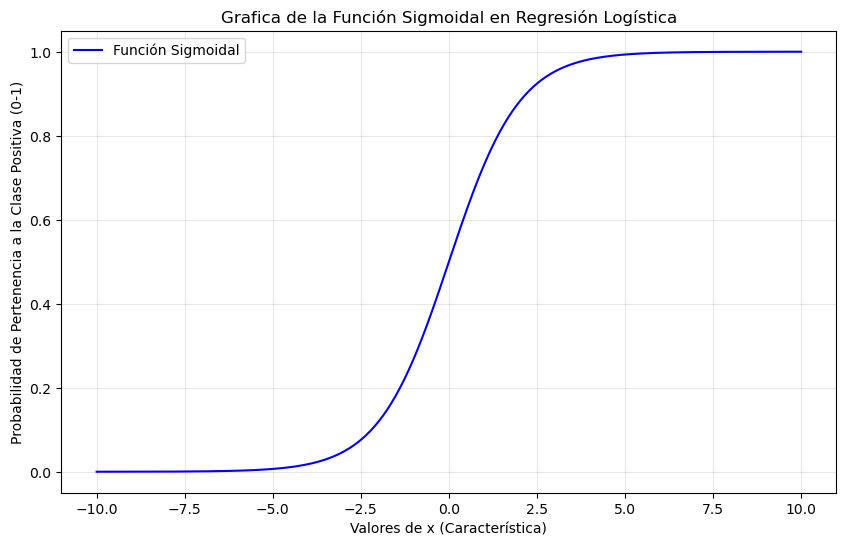

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos para x
x_min, x_max = -10, 10
x_values = np.linspace(x_min, x_max, 500)

# Calcular la función sigmoidal
sigma = 1 / (1 + np.exp(-x_values))

# Graficar la función sigmoidal
plt.figure(figsize=(10, 6))
plt.plot(x_values, sigma, label='Función Sigmoidal', color='blue')
plt.xlabel('Valores de x (Característica)')
plt.ylabel('Probabilidad de Pertenencia a la Clase Positiva (0-1)')
plt.title('Grafica de la Función Sigmoidal en Regresión Logística')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

  # Cálculo de la Función de Regresión Logística

La fórmula general del modelo es:
$$
P(Y=1 | X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$

Donde:

- $ P(Y=1 | X) $: Es la probabilidad de que la variable dependiente $ Y $ sea igual a 1 (evento de interés) dado un conjunto de variables independientes $ X $.

- $Z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n$ son los parámetros del modelo que deben ajustarse a los datos.

- $ X_i $: son las variables de entrada (edad, hábitos, niveles de glucosa, etc).

## Pasos para Calcular la Función de Regresión Logística

### Paso 1: Recolección de Datos

El punto de partida es contar con datos donde conozcamos el resultado (por ejemplo, si una persona tiene una enfermedad o no) y algunas características que puedan estar relacionadas con ese resultado (edad, peso, antecedentes familiares, etc.).

### Paso 2: Definir la Función Lineal

Se construye una combinación lineal de las variables independientes:

$$
Z = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
$$

### Paso 3: Aplicar la Función Sigmoide

La función sigmoide convierte el valor de $ Z $ en una probabilidad:

$$
P(Y=1 | X) = \frac{1}{1 + e^{-Z}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n)}}
$$
Esto garantiza que el resultado siempre esté entre 0 y 1.

### Paso 4: Interpretar los Coeficientes

Cada $ \beta_i $ indica cómo cambia la probabilidad con respecto a $ X_i $. El valor $ e^{\beta_i} $ representa el efecto multiplicativo en las *odds* (chances).

### Paso 5: Ajuste del Modelo

Se ajustan los coeficientes usando máxima verosimilitud.


### Paso 6: Evaluación del Modelo

Se miden métricas como precisión, sensibilidad, F1-score y curva ROC.

## Proceso

1. **Recolección de Datos**: Obtención de un conjunto de datos donde se conoce el resultado (variable dependiente) y las características (variables independientes).
2. **Entrenamiento del Modelo**: Ajustar los coeficientes del modelo usando métodos como la máxima verosimilitud.
3. **Predicción**: Usar el modelo entrenado para predecir la probabilidad de que ocurran ciertos eventos en nuevos datos.
4. **Evaluación**: Medir el rendimiento del modelo mediante métricas como la curva ROC, la precisión y el F1-score.

# Aplicaciones en Investigación Clínica y Salud

- **Predicción de enfermedades**: Estimar riesgo de diabetes, hipertensión, etc.
- **Evaluación de tratamientos**: Analizar la eficacia de intervenciones médicas.
- **Factores de riesgo**: Identificar variables asociadas a condiciones clínicas.
- **Resultados quirúrgicos**: Predecir complicaciones postoperatorias.
- **Salud pública**: Estudiar la distribución de enfermedades en poblaciones.
- **Resultados clínicos**: Estimar riesgo de hospitalización o mortalidad.
- **Salud mental**: Analizar variables asociadas a depresión, ansiedad, etc.

## Conclusión

La regresión logística es una herramienta clave para modelar situaciones donde el resultado es binario. Permite comprender mejor los datos, estimar probabilidades y apoyar la toma de decisiones en contextos reales, especialmente en áreas como la salud, donde su impacto puede ser directo y significativo.

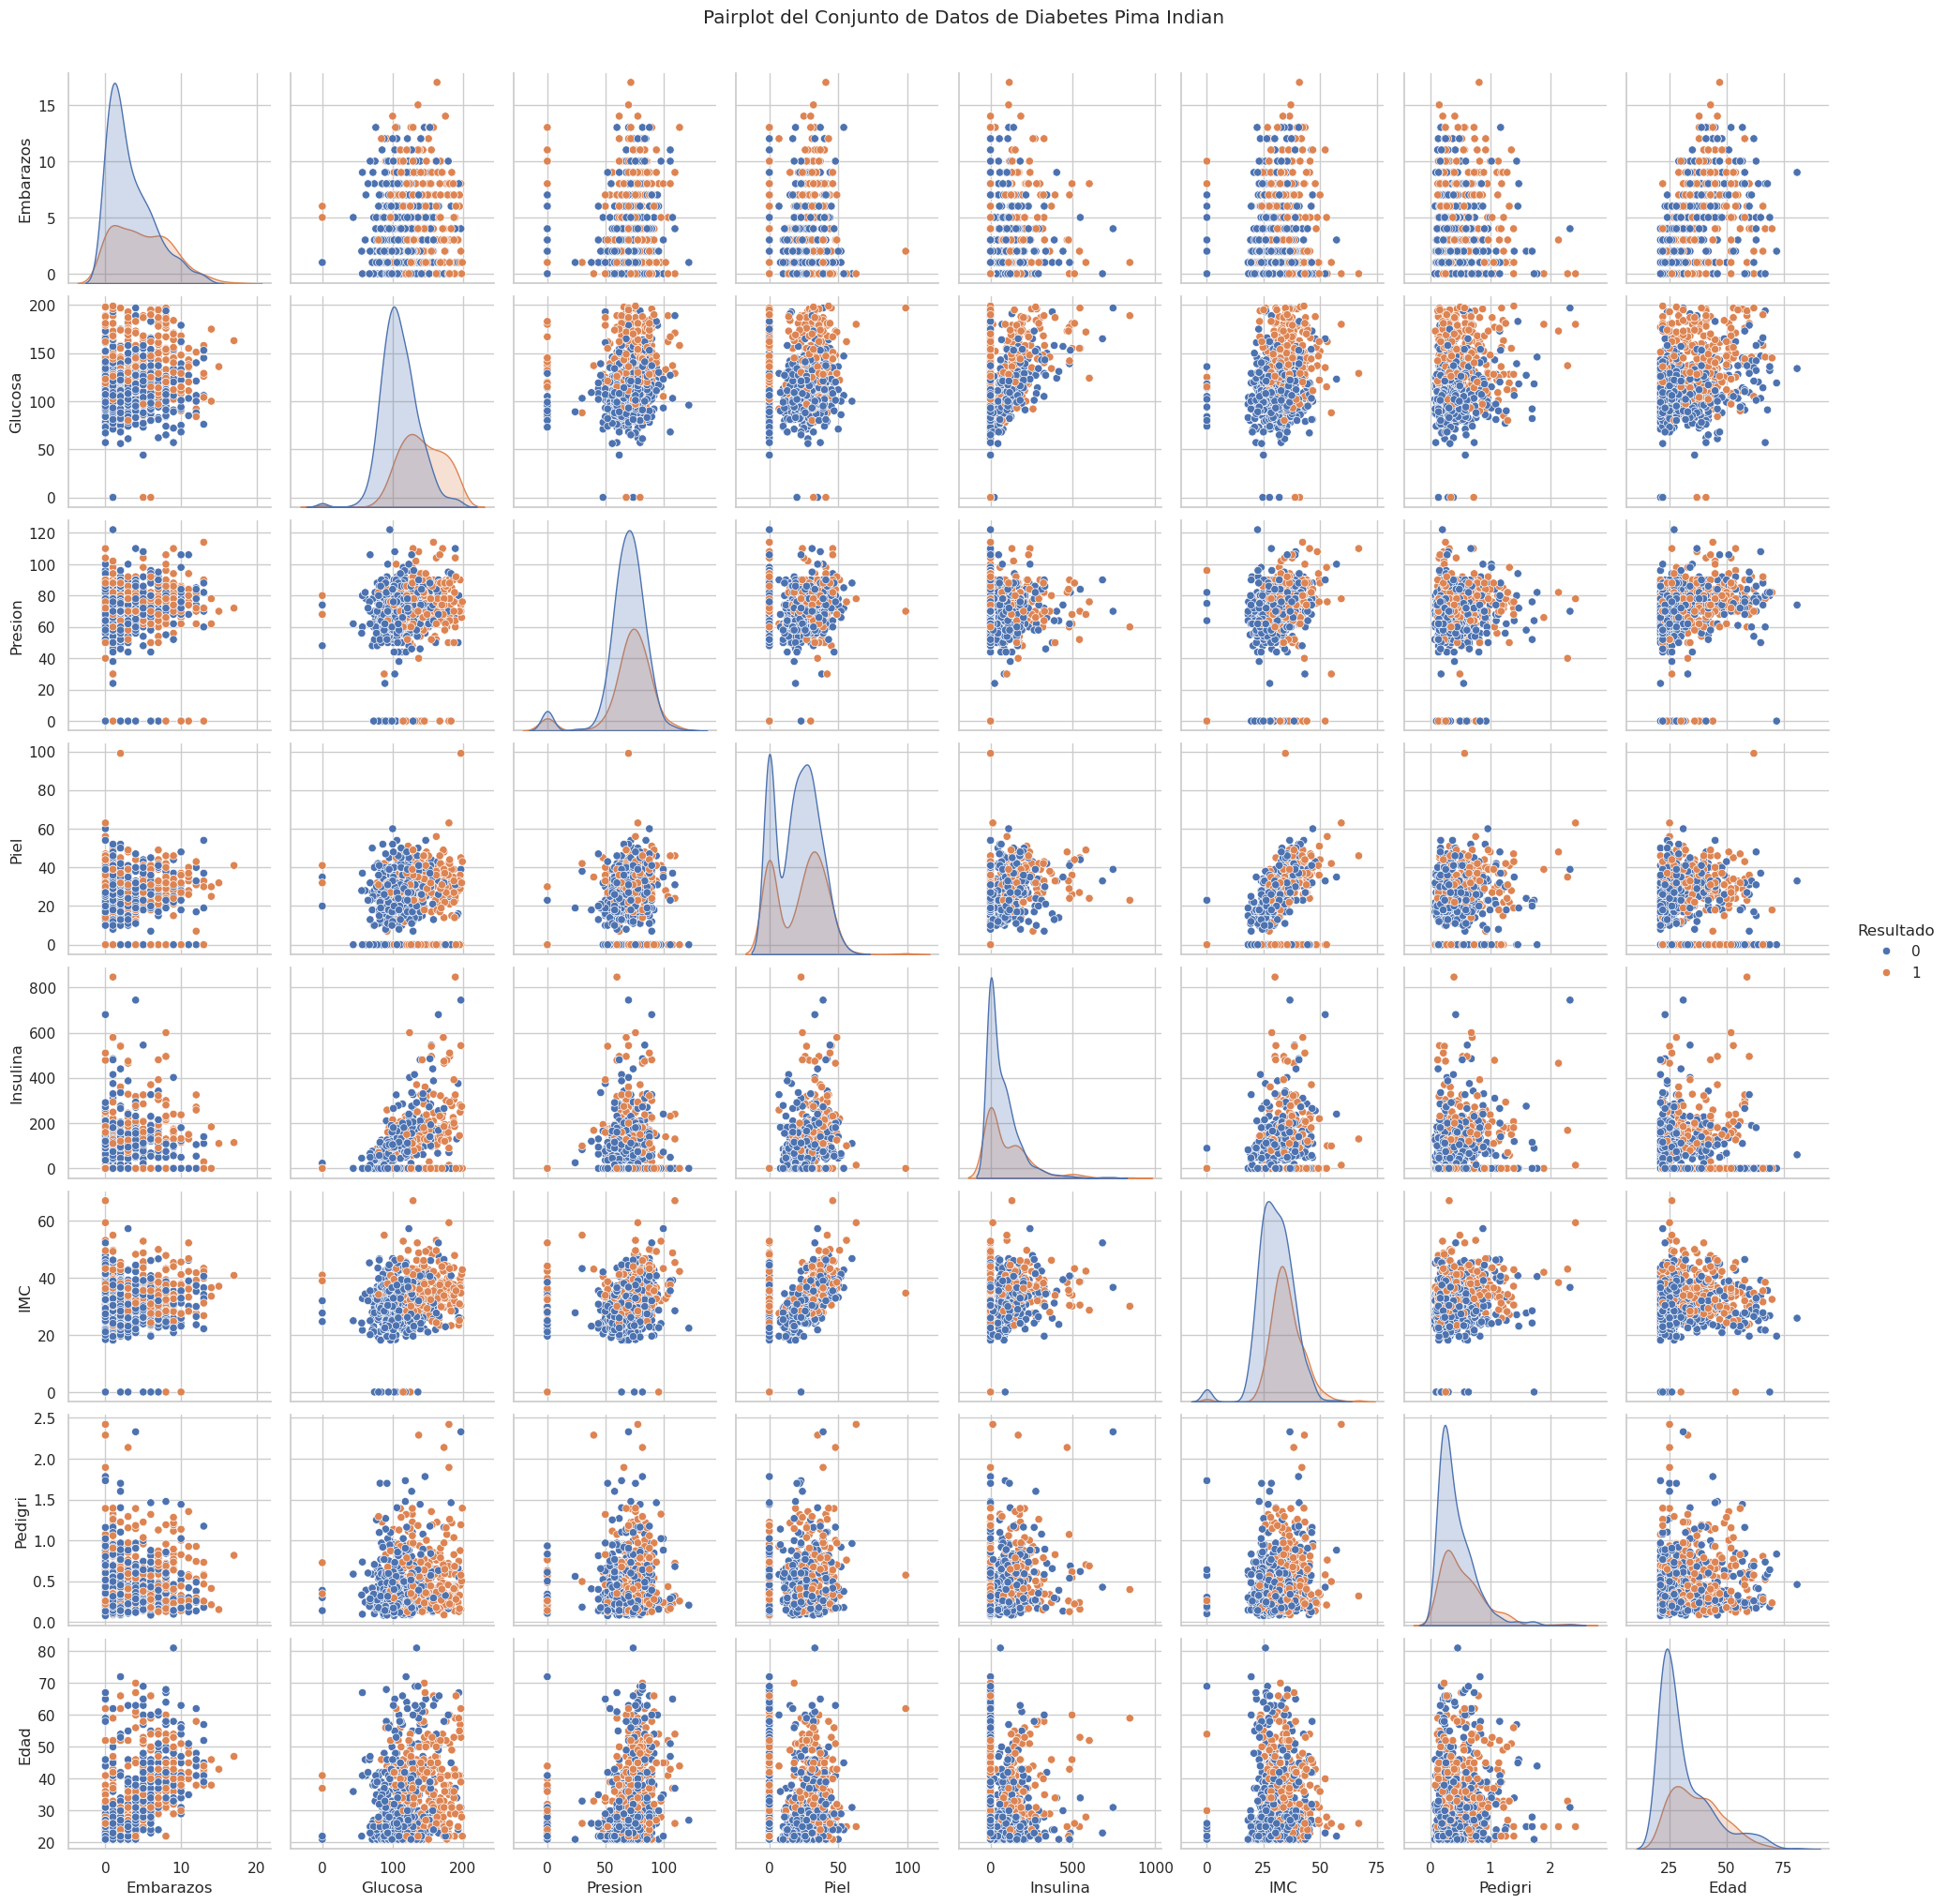

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar la base de datos
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
columns = ['Embarazos', 'Glucosa', 'Presion', 'Piel', 'Insulina', 'IMC', 'Pedigri', 'Edad', 'Resultado']
data = pd.read_csv(url, header=None, names=columns)

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un pairplot y guardarlo en una variable
pairplot = sns.pairplot(data, hue='Resultado')

# Establecer el título al inicio del gráfico
pairplot.fig.suptitle('Pairplot del Conjunto de Datos de Diabetes Pima Indian', y=1.02)
plt.show()

## Preparación para lanzar el modelo
### Se crea los datos de entreno y validación

In [10]:
# Separar las variables independientes y dependientes
X = data.drop('Resultado', axis=1)
y = data['Resultado']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Mostrar los coeficientes
coefficients = pd.DataFrame(model.coef_, columns=X.columns)
coefficients['intercept'] = model.intercept_
coefficients

,Embarazos,Glucosa,Presion,Piel,Insulina,IMC,Pedigri,Edad,intercept
0,0.064373,0.034095,-0.013879,0.003291,-0.001803,0.102607,0.626718,0.037095,-9.006754


# Explicación de los Resultados de la Regresión Logística

Los resultados de la función sigmoide en el contexto de nuestro modelo de regresión logística se presentan a continuación. Cada coeficiente representa la influencia de las variables independientes sobre la log-odds de tener diabetes.

### Coeficientes del Modelo

| Variable                           | Coeficiente   |
|-----------------------------------|---------------|
| **Pregnancies**                   | 0.064372      |
| **Glucose**                       | 0.034094      |
| **BloodPressure**                 | -0.013879     |
| **SkinThickness**                 | 0.003291      |
| **Insulin**                       | -0.001803     |
| **BMI**                           | 0.102608      |
| **DiabetesPedigreeFunction**     | 0.626886      |
| **Age**                           | 0.037097      |
| **Intercept**                     | -9.006833     |

### Función Sigmoide con Coeficientes

La función sigmoide utilizada en la regresión logística se define como:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
$$

Para nuestro modelo, la función sigmoide se puede expresar con los coeficientes de la siguiente manera:

$$
P(Y=1|X) = \frac{1}{1 + e^{-(-9.006833 + 0.064372 \cdot X_1 + 0.034094 \cdot X_2 - 0.013879 \cdot X_3 + 0.003291 \cdot X_4 - 0.001803 \cdot X_5 + 0.102608 \cdot X_6 + 0.626886 \cdot X_7 + 0.037097 \cdot X_8)}}
$$

Donde:
- \( X_1 \) representa el número de **Embarazos**.
- \( X_2 \) representa el nivel de **Glucosa**.
- \( X_3 \) representa la **Presion en sagre**.
- \( X_4 \) representa el **Grosor de la piel**.
- \( X_5 \) representa el nivel de **Insulina**.
- \( X_6 \) representa el **IMC**.
- \( X_7 \) representa la **Pedigri**.
- \( X_8 \) representa la **Edad**.

### Interpretación de los Coeficientes
### Interpretación de los Coeficientes

1. **Embarazos (0.064372)**:
   - Un aumento de una unidad en el número de embarazos se asocia con un incremento del 6.44% en la log-odds de desarrollar diabetes, manteniendo las otras variables constantes.

2. **Glucosa (0.034094)**:
   - Un aumento de una unidad en el nivel de glucosa se asocia con un incremento del 3.41% en la log-odds de desarrollar diabetes.

3. **Presion en sagre (-0.013879)**:
   - Un aumento de una unidad en la presión arterial se asocia con una disminución del 1.39% en la log-odds de desarrollar diabetes.

4. **Grosor de la piel (0.003291)**:
   - Un aumento de una unidad en el grosor de la piel se asocia con un ligero incremento del 0.33% en la log-odds de desarrollar diabetes.

5. **Insulina (-0.001803)**:
   - Un aumento de una unidad en el nivel de insulina se asocia con una disminución del 0.18% en la log-odds de desarrollar diabetes.

6. **IMC (0.102608)**:
   - Un aumento de una unidad en el índice de masa corporal se asocia con un aumento significativo del 10.26% en la log-odds de desarrollar diabetes.

7. **Pedigri (0.626886)**:
   - Un aumento en la función de pedigree de diabetes se asocia con un incremento notable del 62.69% en la log-odds de desarrollar diabetes.

8. **Edad (0.037097)**:
   - Un aumento de un año en la edad se asocia con un incremento del 3.71% en la log-odds de desarrollar diabetes.

9. **Intercepto (-9.006833)**:
   - El intercepto representa la log-odds de que una persona tenga diabetes cuando todas las variables independientes son cero. Un valor tan negativo indica que la probabilidad de tener diabetes es muy baja cuando no se consideran las variables.


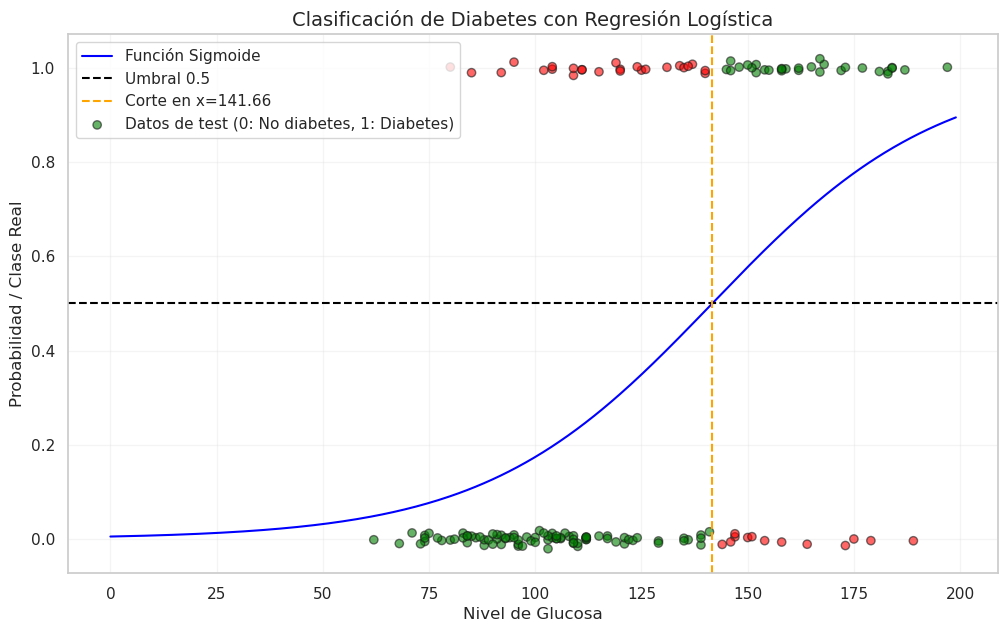

In [15]:
# 2. Seleccionar características y objetivo (usamos solo 'Glucose')
X = X[['Glucosa']]
y = y

# 3. Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Entrenar el modelo de regresión logística (sin regularización)
model = LogisticRegression( solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# 5. Obtener coeficientes del modelo
b0 = model.intercept_[0]
b1 = model.coef_[0][0]

# 6. Generar valores para la curva sigmoide
x_values = np.linspace(X['Glucosa'].min(), X['Glucosa'].max(), 300)
y_sigmoid = 1 / (1 + np.exp(-(b0 + b1 * x_values)))

# 7. Calcular punto de corte (donde y=0.5)
x_corte = -b0 / b1

# 8. Predecir en el conjunto de test
y_pred = model.predict(X_test)
colores = ['green' if pred == real else 'red' for pred, real in zip(y_pred, y_test)]

# 9. Configurar la gráfica
plt.figure(figsize=(12, 7))

# Curva sigmoide
plt.plot(x_values, y_sigmoid, label='Función Sigmoide', color='blue')

# Líneas horizontales y verticales
plt.axhline(0.5, color='black', linestyle='--', label='Umbral 0.5')
plt.axvline(x_corte, color='orange', linestyle='--', label=f'Corte en x={x_corte:.2f}')

# Puntos de test con jitter para visualización
np.random.seed(42)
espaciado = np.random.normal(0, 0.008, size=len(y_test))  # Pequeño espaciado en el eje Y
plt.scatter(X_test['Glucosa'], y_test + espaciado, c=colores, alpha=0.6,
            edgecolor='k', label='Datos de test (0: No diabetes, 1: Diabetes)')

# Configuración estética
plt.xlabel('Nivel de Glucosa', fontsize=12)
plt.ylabel('Probabilidad / Clase Real', fontsize=12)
plt.title('Clasificación de Diabetes con Regresión Logística', fontsize=14)
plt.legend(loc='best')
plt.grid(True, alpha=0.2)
plt.show()

## Matriz de confusión

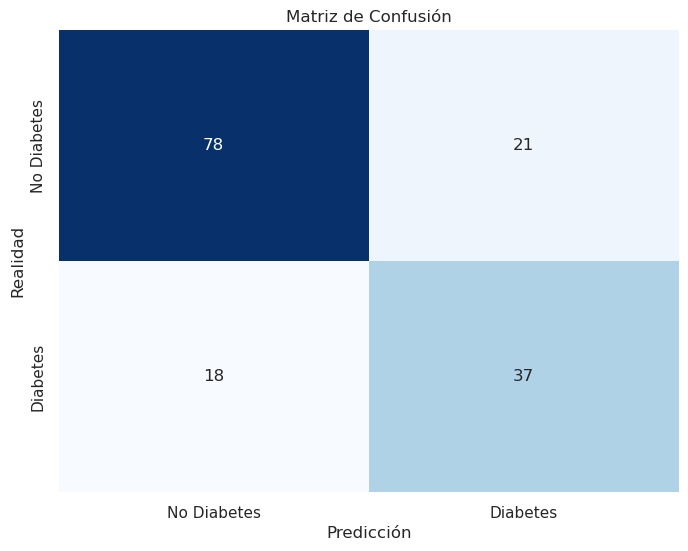

In [16]:
# Separar las variables independientes y dependientes
X = data.drop('Resultado', axis=1)
y = data['Resultado']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y ajustar el modelo de regresión logística
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

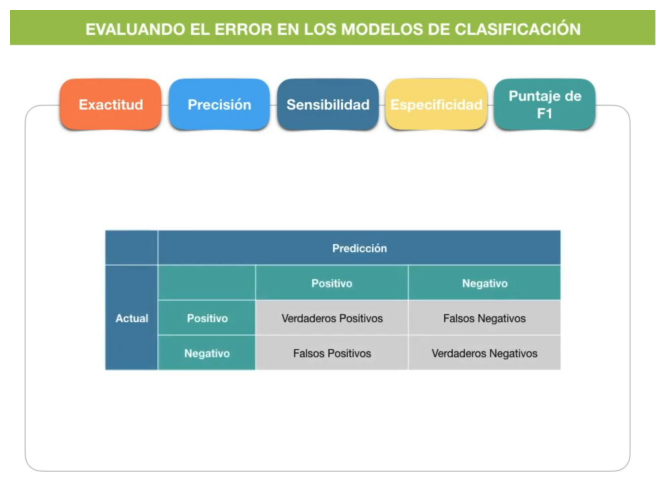

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/Errores.jpg')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

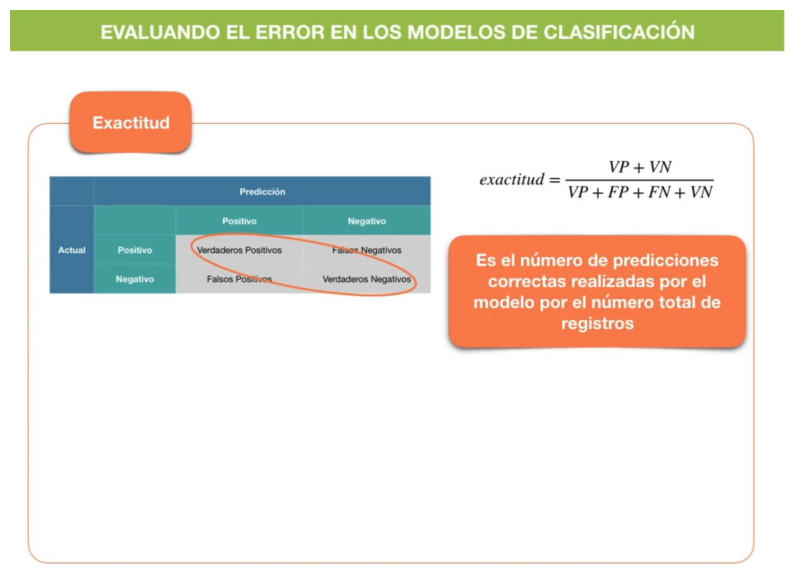

In [45]:
plt.figure(figsize=(10, 9))
img = mpimg.imread("Imagenes/Exactitud.jpg")
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

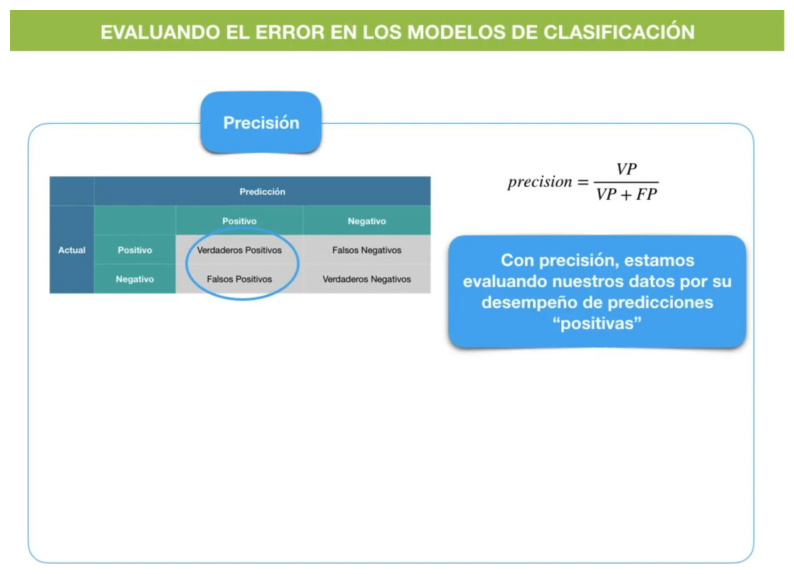

In [46]:
plt.figure(figsize=(10, 9))
img = mpimg.imread("Imagenes/Precision.jpg")
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

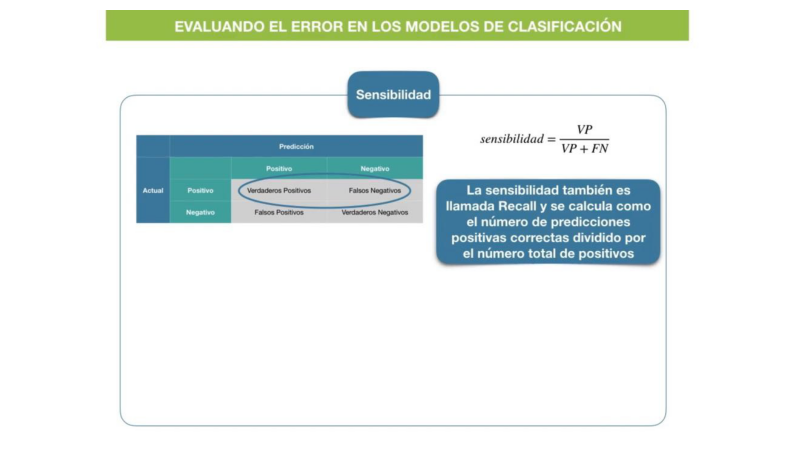

In [47]:
plt.figure(figsize=(10, 9))
img = mpimg.imread("Imagenes/Sensibilidad.jpg")
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

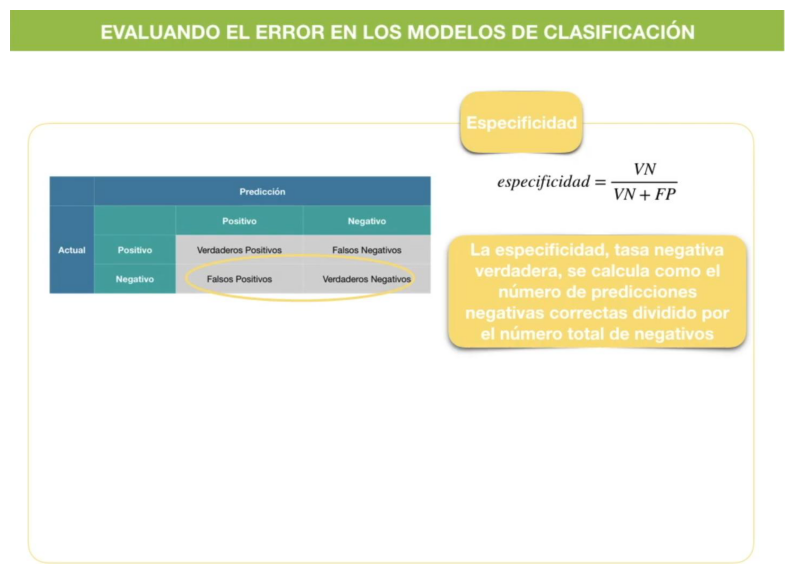

In [48]:
plt.figure(figsize=(10, 9))
img = mpimg.imread("Imagenes/Especificidad.jpg")
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

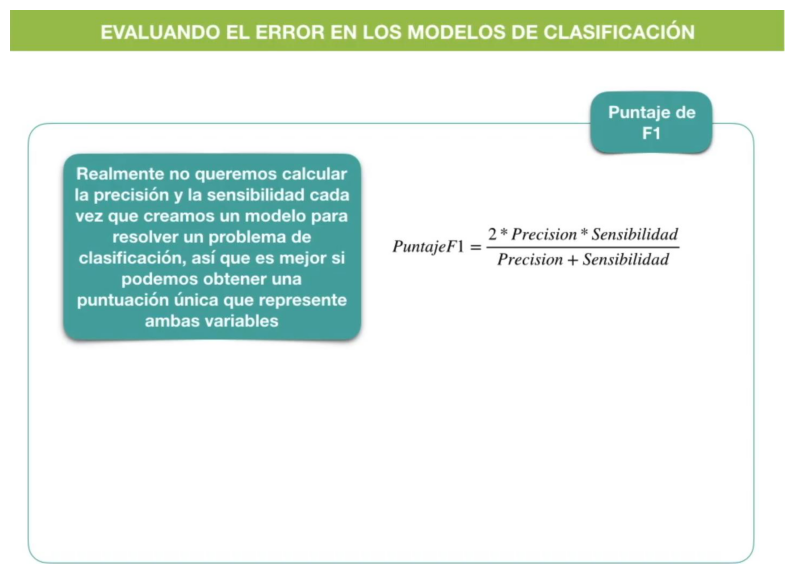

In [49]:
plt.figure(figsize=(10, 9))
img = mpimg.imread("Imagenes/F1.jpg")
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

In [50]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes'])
print(report)


              precision    recall  f1-score   support

 No Diabetes       0.81      0.79      0.80        99
    Diabetes       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



## Mejorando la precisión

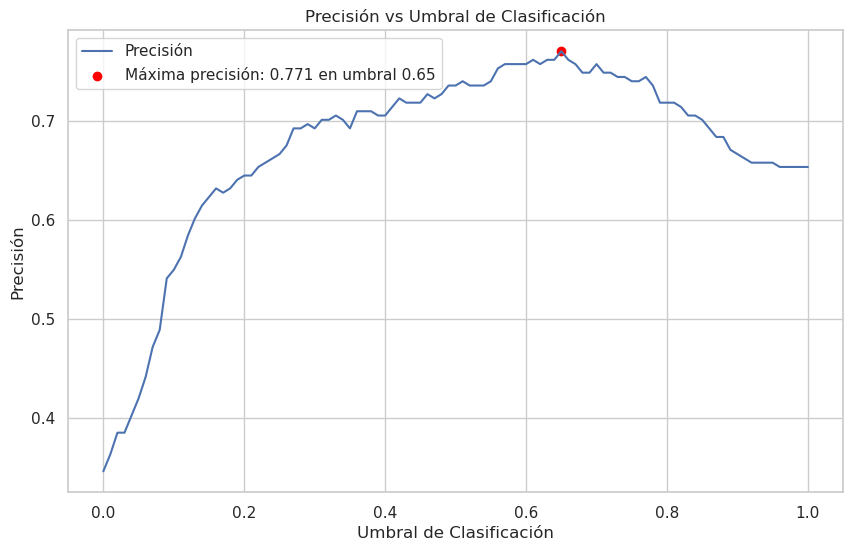

Mejor umbral: 0.65 con precisión: 0.7706


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar el dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['Embarazos', 'Glucosa', 'Presion', 'Piel', 'Insulina', 'IMC', 'Pedigri', 'Edad', 'Resultado']
datos = pd.read_csv(url, names=columnas)

# Separar características y objetivo
X = datos.drop('Resultado', axis=1)
y = datos['Resultado']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo de regresión logística
modelo = LogisticRegression(solver='lbfgs', max_iter=1000)
modelo.fit(X_train, y_train)

# Obtener probabilidades predichas
probabilidades = modelo.predict_proba(X_test)[:, 1]

# Generar rangos de umbrales
umbrales = np.arange(0.0, 1.01, 0.01)
precisiones = []

# Calcular precisión para cada umbral
for umbral in umbrales:
    predicciones = (probabilidades >= umbral).astype(int)
    precision = accuracy_score(y_test, predicciones)
    precisiones.append(precision)

# Encontrar mejor umbral
mejor_precision = max(precisiones)
mejor_umbral = umbrales[np.argmax(precisiones)]

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(umbrales, precisiones, label='Precisión')
plt.scatter(mejor_umbral, mejor_precision, color='red',
            label=f'Máxima precisión: {mejor_precision:.3f} en umbral {mejor_umbral:.2f}')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('Precisión')
plt.title('Precisión vs Umbral de Clasificación')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor umbral: {mejor_umbral:.2f} con precisión: {mejor_precision:.4f}")

In [52]:
def matriz_confusion_umbral(y_true, y_probs, umbral=0.5):
    """
    Genera matriz de confusión para un modelo de clasificación binaria
    con posibilidad de ajustar el umbral de decisión.

    Parámetros:
    y_true (array): Valores verdaderos
    y_probs (array): Probabilidades predichas para la clase positiva
    umbral (float): Umbral para clasificación (default 0.5)

    Retorna:
    DataFrame: Matriz de confusión con etiquetas
    """
    # Aplicar umbral para convertir probabilidades a clases predichas
    y_pred = (y_probs >= umbral).astype(int)

    # Generar matriz de confusión
    cm = confusion_matrix(y_true, y_pred)

    # Convertir a DataFrame con etiquetas
    cm_df = pd.DataFrame(cm,
                         index=['Actual Negativo', 'Actual Positivo'],
                         columns=['Predicho Negativo', 'Predicho Positivo'])
    return cm_df

In [53]:
matriz_confusion_umbral(y_test,probabilidades, umbral=0.65 )

,Predicho Negativo,Predicho Positivo
Actual Negativo,137,14
Actual Positivo,39,41


In [54]:
matriz_confusion_umbral(y_test,probabilidades, umbral=0.5 )

,Predicho Negativo,Predicho Positivo
Actual Negativo,120,31
Actual Positivo,30,50


## Mejorando el F1-score

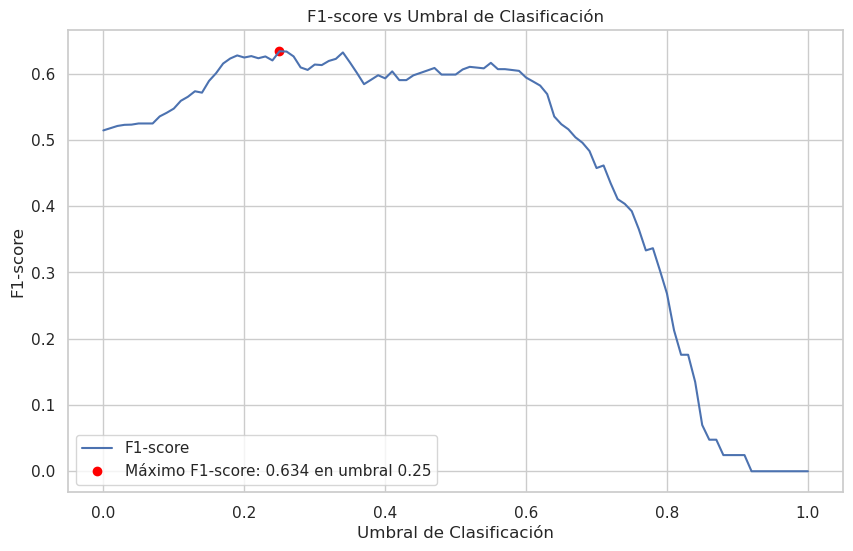

Mejor umbral: 0.25 con F1-score: 0.6339


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
columnas = ['Embarazos', 'Glucosa', 'Presion', 'Piel', 'Insulina', 'IMC', 'Pedigri', 'Edad', 'Resultado']
datos = pd.read_csv(url, names=columnas)

# Separar características y objetivo
X = datos.drop('Resultado', axis=1)
y = datos['Resultado']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar modelo de regresión logística
# Probar diferentes solvers y parámetros de regularización
modelo = LogisticRegression(solver='liblinear', penalty='l1', C=0.1, random_state=42, max_iter=1000)
modelo.fit(X_train, y_train)

# Obtener probabilidades predichas
probabilidades = modelo.predict_proba(X_test)[:, 1]

# Generar rangos de umbrales
umbrales = np.arange(0.0, 1.01, 0.01)
f1_scores = []

# Calcular F1-score para cada umbral
for umbral in umbrales:
    predicciones = (probabilidades >= umbral).astype(int)
    f1 = f1_score(y_test, predicciones)
    f1_scores.append(f1)

# Encontrar mejor umbral
mejor_f1 = max(f1_scores)
mejor_umbral = umbrales[np.argmax(f1_scores)]

# Graficar resultados
plt.figure(figsize=(10, 6))
plt.plot(umbrales, f1_scores, label='F1-score')
plt.scatter(mejor_umbral, mejor_f1, color='red',
            label=f'Máximo F1-score: {mejor_f1:.3f} en umbral {mejor_umbral:.2f}')
plt.xlabel('Umbral de Clasificación')
plt.ylabel('F1-score')
plt.title('F1-score vs Umbral de Clasificación')
plt.legend()
plt.grid(True)
plt.show()

print(f"Mejor umbral: {mejor_umbral:.2f} con F1-score: {mejor_f1:.4f}")

In [56]:
matriz_confusion_umbral(y_test,probabilidades, umbral=0.25 )

,Predicho Negativo,Predicho Positivo
Actual Negativo,78,73
Actual Positivo,9,71
